In [105]:
#importing

import sys
import os
print("Current working directory: ", os.getcwd())
import matplotlib.pyplot as plt
import numpy as np    
import pandas as pd
#!{sys.executable} -m pip install sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Current working directory:  /home/hoogenboom/Documents/Python/IML


In [100]:
#load in data: A2_data.csv
data = pd.read_csv('A2_data.csv')
print("The shape of the data is", data.shape)

The shape of the data is (100000, 12)


In [92]:
#Print data properties
print("These are the variables:",data.columns)
print("The data points have one of three labels:", np.unique(data['class']))
print("The amount of galaxies is",np.count_nonzero([np.where(data['class']=="GALAXY")]))
print("The amount of QSOs is",np.count_nonzero([np.where(data['class']=="QSO")]))
print("The amount of stars is",np.count_nonzero([np.where(data['class']=="STAR")]))

These are the variables: Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD',
       'redshift', 'plate', 'class'],
      dtype='object')
The data points have one of three labels: ['GALAXY' 'QSO' 'STAR']
The amount of galaxies is 59444
The amount of QSOs is 18961
The amount of stars is 21594


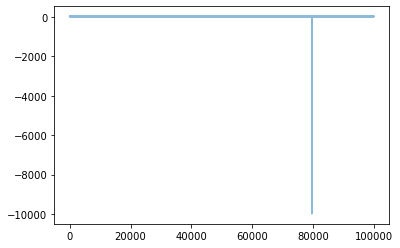

In [82]:
#finding outliers
plt.plot(data['u'], alpha = 0.5)
plt.show()
#find outliers
#plt.plot(data['g'], alpha = 0.5)
#plt.show()
#plt.plot(data['r'], alpha = 0.5)
#plt.show()
#plt.plot(data['i'], alpha = 0.5)
#plt.show()
#plt.plot(data['redshift'], alpha = 0.5)
#plt.show()

In [129]:
#when selecting data...
#print("The index of the outlier is",np.where(data['z']<0))
datagood = data.loc[np.where(data['z']>0)]
#plt.plot(datagood['u'], alpha = 0.5)

datashort = datagood[['u','g','r','i','z','redshift','class']]

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,-0.001584,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,-0.824700,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,-0.418000,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,5.953000,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.846000,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.046000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,5.290000,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,-4.145000,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,7.152000,GALAXY


In [106]:
#Cross-validation (KFold)
kfold = KFold(n_splits = 5)
print(kfold)

KFold(n_splits=5, random_state=None, shuffle=False)


In [115]:
#train in each loop
for train_ind, test_ind in kfold.split(datashort):
    train_set = datashort.iloc[train_ind]
    test_set = datashort.iloc[test_ind]
    print(1)
    
    

1
1
1
1
1


,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,56064,-0.001584,854,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,53727,-0.824700,3292,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,54883,-0.418000,5888,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,51783,5.953000,536,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,56069,0.846000,9427,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...
79996,34.850687,-0.854422,23.16107,22.23847,21.50662,21.12940,20.36789,654,53108,1.138000,3804,GALAXY
79997,244.777801,28.495050,20.30002,18.79150,17.78136,17.31690,16.97376,130,56947,2.584000,3406,GALAXY
79998,136.367521,35.283269,19.33922,18.29016,17.71565,17.39797,17.18151,77,54085,-0.354700,5028,GALAXY
79999,242.740146,41.871060,18.87620,17.12792,16.30108,15.91631,15.61351,211,53033,-1.005000,4077,GALAXY
